In [ ]:
## 실습 1-1

# AND gate 구현 함수 정의
def AND_gate(x1, x2):
    w1 = 1.0 # 입력 x1의 가중치
    w2 = 1.0 # 입력 x2의 가중치
    b = -1.5 # 편향값(bias)
    result = x1 * w1 + x2 * w2 + b # 가중합 계산

    # 활성화 함수로 계단 함수(step function) 적용 -> 0과 1로 이진화
    return 1 if result > 0 else -1

# AND gate의 모든 입력 조합에 대한 결과 출력
inputs = [(0,0), (0,1), (1,0), (1,1)]
for x1, x2 in inputs:
    y = AND_gate(x1, x2)
    print("x1 = %d, x2 = %d -> y = %d" %(x1, x2, y))

x1 = 0, x2 = 0 -> y = -1
x1 = 0, x2 = 1 -> y = -1
x1 = 1, x2 = 0 -> y = -1
x1 = 1, x2 = 1 -> y = 1


In [ ]:
## 실습 1-2

# OR gate 구현 함수 정의
def OR_gate(x1, x2):
    w1 = 1.0 # 입력 x1의 가중치
    w2 = 1.0 # 입력 x2의 가중치
    b = -0.5 # 편향값(bias)
    result = x1 * w1 + x2 * w2 + b # 가중합 계산

    # 활성화 함수로 계단(step function) 적용
    return 1 if result >0 else -1

# OR gate의 모든 입력 조합에대한 결과 출력
inputs = [(0,0), (0,1), (1,0), (1,1)]
for x1, x2 in inputs:
    y = OR_gate(x1, x2)
    print("x1 = %d, x2 = %d -> y = %d" % (x1, x2, y))

x1 = 0, x2 = 0 -> y = -1
x1 = 0, x2 = 1 -> y = 1
x1 = 1, x2 = 0 -> y = 1
x1 = 1, x2 = 1 -> y = 1


In [ ]:
## 실습 1-3

# NAND gate 구현 함수정의
def NAND_gate(x1, x2):
    w1 = -1.0   # 입력 x1의 가중치
    w2 = -1.0   # 입력 x2의 가중치
    b = 1.5     # 편향(bias)

    result = x1 * w1 + x2 * w2 + b  # 가중합 계산

    # 계단 함수 (step function) 적용
    return 1 if result > 0 else -1 

# NAND gate의 모든 입력 조합에 대한 결과 출력
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
for x1, x2 in inputs:
    y = NAND_gate(x1, x2)
    print("x1 = %d, x2 = %d -> y = %d" % (x1, x2, y))


x1 = 0, x2 = 0 -> y = 1
x1 = 0, x2 = 1 -> y = 1
x1 = 1, x2 = 0 -> y = 1
x1 = 1, x2 = 1 -> y = -1


In [ ]:
## 실습 1-1

# AND gate 구현 함수 정의
def AND_gate(x1, x2):
    w1 = 2.0 # 입력 x1의 가중치 변경
    w2 = 2.0 # 입력 x2의 가중치 변경
    b = -1.5 # 편향값(bias)
    result = x1 * w1 + x2 * w2 + b # 가중합 계산

    # 활성화 함수로 계단 함수(step function) 적용
    return 1 if result > 0 else -1

# AND gate의 모든 입력 조합에 대한 결과 출력
inputs = [(0,0), (0,1), (1,0), (1,1)]
for x1, x2 in inputs:
    y = AND_gate(x1, x2)
    print("x1 = %d, x2 = %d -> y = %d" %(x1, x2, y))

x1 = 0, x2 = 0 -> y = -1
x1 = 0, x2 = 1 -> y = 1
x1 = 1, x2 = 0 -> y = 1
x1 = 1, x2 = 1 -> y = 1


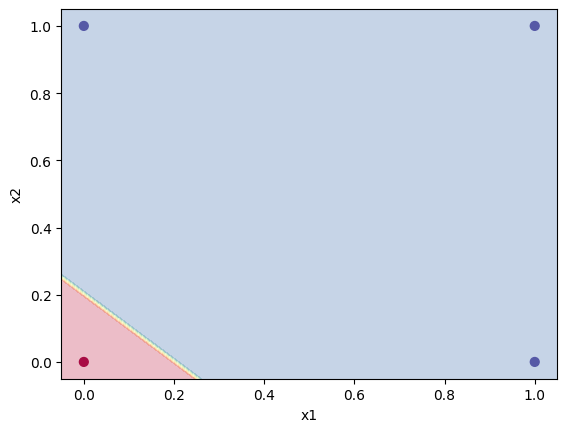

In [ ]:
## 실습2 단일 퍼셉트론의 가중치 학습하기

# 필요한 라이브러리 임포트
import numpy as np

# 데이터 설정(입력 데이터와 레이블)
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]]) # 입력 데이터
y = np.array([-1, 1, 1, 1]) # 레이블(AND gate의 출력)

# 퍼셉트론 모델 정의
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.W = np.ones(input_size + 1) # 가중치를 모두 1로 초기화
        # input_size + 1: 편향(bias) 추가
        self.lr = lr # 학습률 -> 가중치를 얼마나 크게 조정할지 결정
    
    def activation_fn(self, x):
       return np.where(x >= 0, 1, -1) # 계단 함수
    
    def fit(self, X, y):
       for _ in range(10): # 반복 학습 횟수
            # _: 반복 변수를 쓰지 않겠다는 의미
            for xi, target in zip(X, y): # (입력데이터, 정답데이터) 묶어서 반복
                xi = np.insert(xi, 0, 1) # 편향을 위한 항상 1인 입력값을 앞에 추가
                y_pred = self.activation_fn(self.W.dot(xi)) # 예측값
                # self.W.dot(xi): 가중합 계산
                self.W += self.lr * (target - y_pred) * xi # 가중치 업데이트 = 학습률 * 오차 * 입력값
                # 기존 가중치에 더함

# 퍼셉트론 인스턴스 생성 및 학습
perceptron = Perceptron(input_size=2)
perceptron.fit(X, y)

# 학습된 가중치 출력
perceptron.W
    
  
# 시각화 라이브러리 임포트
import matplotlib.pyplot as plt

# 결정 경계를 그리는 함수
def plot_decision_boundary(X, y, model):
   plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=40) # 산점도
   # 산점도: X의 첫 번째 열(x1), 두 번째 열(x2), 색상(y), 색상 맵, 점 크기
   ax = plt.gca() # 현재 축을 가져오기
   xlim, ylim = ax.get_xlim(), ax.get_ylim() # 현재 그래프의 x, y 축 범위 확인
   xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), # np.meshgrid 두 축을 격자 모양으로 만들기, 50 등분
                         np.linspace(ylim[0], ylim[1], 50))
   Z = np.apply_along_axis(
     lambda x: model.activation_fn(model.W.dot(np.insert(x, 0, 1))),
     1, np.c_[xx.ravel(), yy.ravel()]) # np.c_: 두 배열을 열 방향으로 연결, 2차원 배열

   Z = Z.reshape(xx.shape) # 결과를 2차원으로 변형
   plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
   plt.xlabel('x1')
   plt.ylabel('x2')

# 퍼셉트론의 결정 경계 시각화
plot_decision_boundary(X, y, perceptron)
plt.show()